# NFL Stadium Arrest Analysis from 2011 to 2015

I got this dataset from the Washington Post by way of kaggle.com.  The dataset contains variables such as game time, home team, away team, final score, and number of arrests.  This dataset is incomplete.  Cleveland and New Orleans did not participate.  Buffalo, Miami, and Oakland sent partial arrest figures for home games between 2011 and 2015.  St. Louis provided year-by-year arrest data instead of game-by-game data.  Atlanta, Detroit, and Minneapolis did not include arrests occurring in parking lots. 

I want to explore the relationship of arrests to other variables provided in this dataset.  I'll start with a simple question:
###### Which teams are involved in the most arrests?

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv(r'C:\Users\chase\Anaconda3\Database_Dictionary\Thinkful_Unit2\NFL_Arrests\arrests.csv') 


Firstly, I want to see what teams are involved in the most arrests so I plotted team arrests by home game and away game on a bar graph.

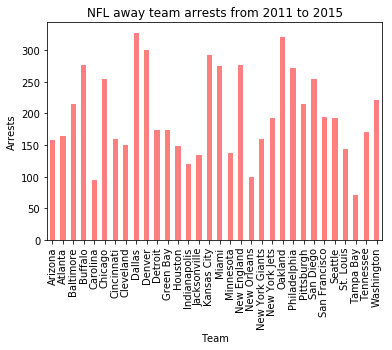

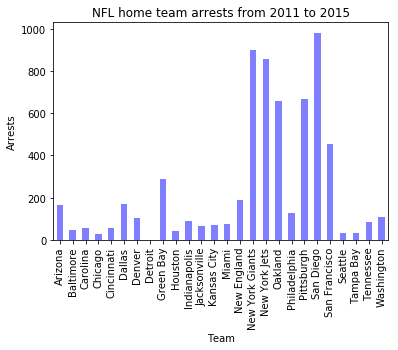

In [224]:
df2 = df.groupby('home_team')['arrests'].sum()
df3 = df.groupby('away_team')['arrests'].sum()

plt.subplot()
df3.dropna().plot(kind='bar', color='red', alpha=0.5)
plt.title("NFL away team arrests from 2011 to 2015")
plt.ylabel("Arrests")
plt.xlabel("Team")
plt.xticks(rotation=90)
plt.show()

plt.subplot()
df2.plot(kind='bar', color='blue', alpha=0.5)
plt.title("NFL home team arrests from 2011 to 2015")
plt.ylabel("Arrests")
plt.xlabel("Team")
plt.xticks(rotation=90)
plt.show()

There was no clear outliers for arrests given the away team.  The two at the top of the back being the Dallas Cowboys and the Oakland Raiders.

San Diego, New York, Oakland, Pittsburgh, and San Franciso have the most arrests at their home games and it's not particularly close with the rest of the league.  Oakland has appeared in the top of both home and away categories.  If you know anything about the NFL, the Raiders fans have a bit of a reputation. Looks like we should investigate!
###### Are Oakland's arrest rates significant?
Lets take a look by comparing Oakland to the NFL population.

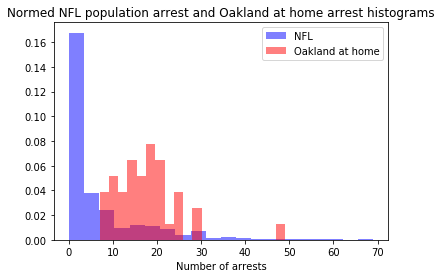

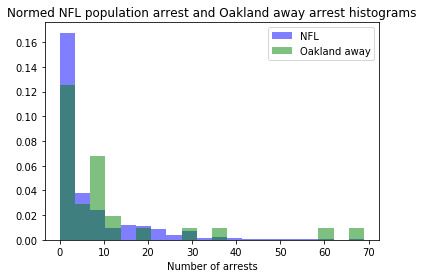

In [249]:
raiders_h = df.loc[df['home_team'] == 'Oakland']
raiders_a = df.loc[df['away_team'] == 'Oakland']


plt.subplot()
plt.hist(df['arrests'].dropna(), alpha=0.5, color='blue', density=True, bins=20)
plt.hist(raiders_h['arrests'], color='red', alpha=0.5, density=True, bins=20)
plt.title("Normed NFL population arrest and Oakland at home arrest histograms")
plt.xlabel('Number of arrests')
plt.legend(['NFL', 'Oakland at home'])
plt.show()

plt.subplot()
plt.hist(df['arrests'].dropna(), alpha=0.5, color='blue', density=True, bins=20)
plt.hist(raiders_a['arrests'].dropna(), color='green', alpha=0.5, density=True, bins=20)
plt.title("Normed NFL population arrest and Oakland away arrest histograms")
plt.xlabel('Number of arrests')
plt.legend(['NFL', 'Oakland away'])
plt.show()

In [246]:
df['arrests'].dropna().describe()

count    966.000000
mean       6.566253
std        9.512101
min        0.000000
25%        1.000000
50%        3.000000
75%        8.000000
max       69.000000
Name: arrests, dtype: float64

In [247]:
raiders_h['arrests'].describe()

count    37.000000
mean     17.783784
std       7.699694
min       7.000000
25%      13.000000
50%      17.000000
75%      21.000000
max      49.000000
Name: arrests, dtype: float64

In [248]:
raiders_a['arrests'].dropna().describe()

count    30.000000
mean     10.700000
std      16.856698
min       0.000000
25%       2.000000
50%       4.000000
75%       8.000000
max      69.000000
Name: arrests, dtype: float64

In [256]:
from scipy.stats import mannwhitneyu
mannwhitneyu(raiders_h['arrests'], df['arrests'].dropna())

MannwhitneyuResult(statistic=4939.5, pvalue=2.402241468818251e-14)

In [258]:
from scipy.stats import mannwhitneyu
mannwhitneyu(raiders_a['arrests'].dropna(), df['arrests'].dropna())

MannwhitneyuResult(statistic=11894.5, pvalue=0.04581965724343634)

According to the Mann-Whitney U test, Oakland's arrests at home differ significantly from the rest of the NFL with 99% confidence;  Oakland's away games also differ from the rest of the NFL with 95% confidence.  The minimum number of arrests for an Oakland home game is 7, and the max for an away game is 69!  This max is also the NFL's max arrests for a game.  Lets graph a boxplot to look at outliers:  

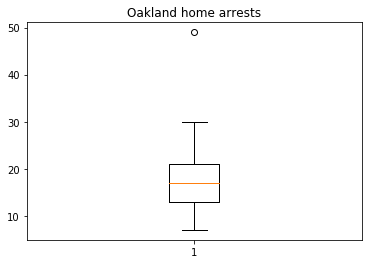

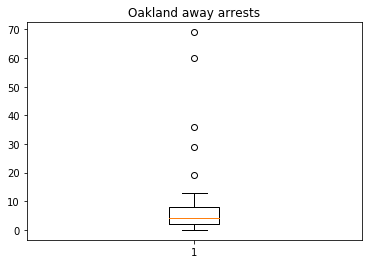

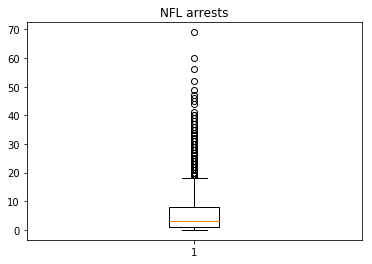

In [266]:
plt.subplot()
plt.boxplot(raiders_h['arrests'])
plt.title('Oakland home arrests')
plt.show()

plt.subplot()
plt.boxplot(raiders_a['arrests'].dropna())
plt.title('Oakland away arrests')
plt.show()

plt.subplot()
plt.boxplot(df['arrests'].dropna())
plt.title('NFL arrests')
plt.show()

Oakland's home arrests are pretty consistent, with their largest away arrest outliers being the two largest arrest outliers in the entire NFL.  Perhaps when going to an NFL game featuring Oakland, drink a few less beers to avoid trouble!  Up to this point we've been looking at Oakland versus the NFL population, but what about other variables? Next, we'll look at some.
###### What variables may correlate to more arrests in an NFL game?


In [200]:
df['score_difference'] = df['home_score']-df['away_score']
df['score_difference'].describe()

count    1006.000000
mean        2.819085
std        14.789975
min       -38.000000
25%        -7.000000
50%         3.000000
75%        12.000000
max        58.000000
Name: score_difference, dtype: float64

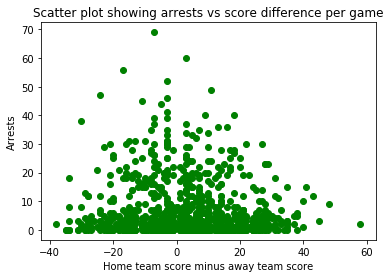

In [269]:
x=(df['score_difference'])
y=(df['arrests'])

plt.scatter(
    x,
    y,
    color='green')
plt.xlabel('Home team score minus away team score')
plt.ylabel('Arrests')
plt.title('Scatter plot showing arrests vs score difference per game')
plt.show()

I wanted to see how a closer game and arrests were related.  This graph shows a small clustering around a smaller score difference.  In fact, it shows more arrests centered around a score where the home team is losing by a small margin which makes sense.  Home team losing --> angry home fans --> fights --> arrests.  

Next, I will try to see if there is a relationship between games being played later in the day and arrests.

Quick tangent:  The score_difference variable above shows some interesting data regarding the competitivness of the NFL, lets plot:  

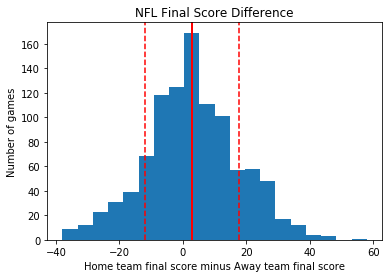

In [213]:
plt.hist(df['score_difference'], bins=20)
plt.title('NFL Final Score Difference')
plt.xlabel('Home team final score minus Away team final score')
plt.ylabel('Number of games')
plt.axvline(df['score_difference'].mean(), color='red', linestyle='solid', linewidth=2)
plt.axvline(df['score_difference'].mean()+df['score_difference'].std(), color='red', linestyle='dashed')
plt.axvline(df['score_difference'].mean()-df['score_difference'].std(), color='red', linestyle='dashed')
plt.show()

The NFL averages final scores within 3 points! This was unrelated to arrests but I thought it was interesting nonetheless.  Back to variables and arrests:

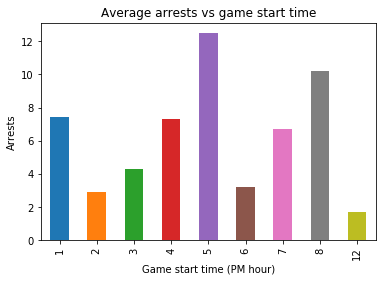

In [231]:
# Because of the gametime_local format, I had to seperate it into an hours and minutes coloumn
df['gametime_local'].iloc[0].split(":")
df["hours"] = [np.int(x.split(":")[0]) for x in df["gametime_local"] ]
df["minutes"] = [np.int(x.split(":")[1]) for x in df["gametime_local"] ]

#Here I wanted to make sure that there were no AM games; because there are not, I can plot against hours.
df["PM"] = [1 if "PM" in x.split(":")[2] else 0 for x in df["gametime_local"] ]
df['PM'].value_counts()

df5 = df.groupby('hours')['arrests'].mean()
df5
df5.plot(kind='bar')
plt.title('Average arrests vs game start time')
plt.xlabel('Game start time (PM hour)')
plt.ylabel('Average arrests')
plt.show()

The graph above shows the average number of arrests given the hour the game starts.  Generally, the later in the day the more arrests occur.  Given the tailgating culture in the US, this shouldn't come as much of a surprise.

### Further Studies:
What effect may variables such as beer sales and percentage of away fans present contribute to arrests? --> Just like above I would like to get better at quantifying correlations between variables.  I would like to get the data proposed, and run correlational analysis.

Has the NFL arrest rate been increasing? Given what you find, what may explain this?
I could run this analysis by getting average league wide arrests per year and graphing that over time.  Then, depending on correlational analysis I could graph other variables over time and potentially infer a relationship    
 